In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
slurm = pd.read_csv("/mnt/research/CMSE495-SS24-ICER/slurm_usage/DID_FINAL_SLURM_OCT_2023.csv",delimiter="|",nrows=1000)

In [3]:
slurm

,Unnamed: 0,Unnamed: 0.1,JobID,User,Group,Submit,Start,End,Elapsed,State,...,CPUTimeRAW,ReqCPUS,AllocCPUS,ReqMem,MaxRSS,ReqNodes,NNodes,NodeList,ReqTRES,AllocTRES
0,0,0,31496544,user_679,group_121,2023-03-21T11:13:45,Unknown,Unknown,00:00:00,PENDING,...,0,28,0,21000M,NaN,1,1,None assigned,"billing=3192,cpu=28,gres/gpu=4,mem=21000M,node=1",NaN
1,1,1,31497932,user_679,group_121,2023-03-21T11:31:18,Unknown,Unknown,00:00:00,PENDING,...,0,28,0,21000M,NaN,1,1,None assigned,"billing=3192,cpu=28,gres/gpu=4,mem=21000M,node=1",NaN
2,2,2,31993628,user_105,group_114,2023-03-22T18:19:12,Unknown,Unknown,00:00:00,PENDING,...,0,12,0,150G,NaN,1,1,None assigned,"billing=23347,cpu=12,gres/gpu=8,mem=150G,node=1",NaN
3,3,3,39087660,user_652,group_054,2023-04-04T13:09:10,Unknown,Unknown,00:00:00,PENDING,...,0,640,0,20G,NaN,10,10,None assigned,"billing=3112,cpu=640,mem=20G,node=10",NaN
4,4,4,59062820,user_188,group_046,2023-05-08T09:58:20,2024-01-01T00:58:57,2024-01-01T00:59:06,00:00:09,COMPLETED,...,360,40,40,8G,NaN,1,1,skl-029,"billing=1245,cpu=40,mem=8G,node=1","billing=1245,cpu=40,mem=8G,node=1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,995,90366424,user_258,group_010,2023-09-29T00:54:50,2023-09-29T00:54:50,2023-10-02T09:48:18,3-08:53:28,FAILED,...,7280200,25,25,NaN,421032K,1,1,amr-234,NaN,"cpu=25,mem=200G,node=1"
996,996,996,90366424,user_258,group_010,2023-09-29T00:54:50,2023-09-29T00:54:50,2023-10-02T09:48:19,3-08:53:29,COMPLETED,...,7280225,25,25,NaN,0,1,1,amr-234,NaN,"billing=31129,cpu=25,mem=200G,node=1"
997,997,997,90375532,user_082,group_127,2023-09-25T15:15:32,2023-09-29T02:05:46,2023-10-02T09:48:27,3-07:42:41,FAILED,...,7174025,5,25,200G,NaN,1,1,amr-208,"billing=31129,cpu=5,mem=200G,node=1","billing=31129,cpu=25,mem=200G,node=1"
998,998,998,90375532,user_258,group_010,2023-09-29T02:05:46,2023-09-29T02:05:46,2023-10-02T09:48:27,3-07:42:41,FAILED,...,7174025,25,25,NaN,548156K,1,1,amr-208,NaN,"cpu=25,mem=200G,node=1"


In [5]:
slurm.dtypes

Unnamed: 0       int64
Unnamed: 0.1     int64
JobID            int64
User            object
Group           object
Submit          object
Start           object
End             object
Elapsed         object
State           object
Account         object
AssocID         object
Partition       object
Timelimit       object
UserCPU         object
SystemCPU       object
TotalCPU        object
CPUTime         object
CPUTimeRAW       int64
ReqCPUS          int64
AllocCPUS        int64
ReqMem          object
MaxRSS          object
ReqNodes         int64
NNodes           int64
NodeList        object
ReqTRES         object
AllocTRES       object
dtype: object

In [42]:
slurm["ReqMem"].unique()

array(['21000M', '150G', '20G', '8G', '84G', '132G', '315000M', '500G',
       '500000M', '120G', '32G', '240000M', '8083232M', nan, '16166464M',
       '1T', '192G', '900G', '360G', '44G', '50G', '160G', '18G', '2500G',
       '200G'], dtype=object)

Column time formats/basic information:
"Submit"-> ISO 8601 
"Start"->  ISO 8601 
"End" ->   ISO 8601 
"Elapsed" -> Unorthodox, but best guess is days-hours:minutes:seconds
"State" -> 'PENDING', 'COMPLETED', 'CANCELLED by 833599', 'TIMEOUT',
       'CANCELLED', 'FAILED', 'REQUEUED', 'CANCELLED by 846118',
       'NODE_FAIL'    9 total types
"Timelimit" -> days-hours:minutes:seconds (guess)
"UserCPU" -> days-hours:minutes:seconds
"SystemCPU" -> days-hours:minutes:seconds
"TotalCPU" ->
"CPUTime" -> no clue
"CPUTimeRAW" -> raw time in minutes?
""

Basic Distributions of Data set features


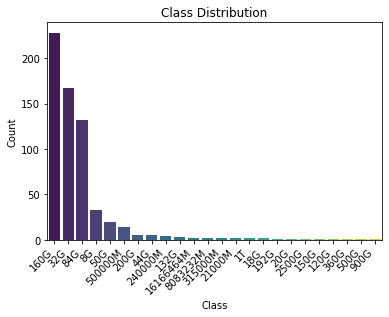

In [47]:
print("Basic Distributions of Data set features")
class_counts_req_mem = df_filtered['ReqMem'].value_counts()

sns.barplot(x=class_counts_req_mem.index, y=class_counts_req_mem, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [43]:
df_filtered = slurm[slurm['ReqMem'] != 'NaN']
#df_filtered = slurm[slurm['Start'] != 'Unknown']



In [ ]:
class_counts = df['Class'].value_counts()